# 🧠 Big Data Handling Assignment
## Dataset: MyAnimeList Ratings (`MAL_ratings.csv`)

## ✅ Task 1: Dataset Selection
- **Name**: MyAnimeList Dataset
- **Source**: [Kaggle - MyAnimeList Dataset](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset)
- **Size**: ~700MB – 4.5GB (varies by file)
- **Domain**: Anime user reviews and statistics
- **Number of Records**:
  - `MAL_anime.csv`: ~39,000 anime entries
  - `MAL_users.csv`: ~2 million users
  - `MAL_ratings.csv`: ~24 million ratings

## 🔧 Task 2: Load and Inspect Data

In [5]:
# Upload Kaggle credentials
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [6]:
# Move kaggle.json to correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Download dataset from Kaggle
!kaggle datasets download -d dbdmobile/myanimelist-dataset

Dataset URL: https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset
License(s): DbCL-1.0
User cancelled operation


In [8]:
# Unzip the dataset
!unzip myanimelist-dataset.zip

Archive:  myanimelist-dataset.zip
replace anime-dataset-2023.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
print("check the file size (to confirm it's >700MB)\n")

!ls -l final_animedataset.csv

check the file size (to confirm it's >700MB)

-rw-r--r-- 1 root root 4549801910 Jul 28  2023 final_animedataset.csv


## Load First Few Rows to Inspect

In [26]:
import pandas as pd

# Load first 10 rows to inspect
df = pd.read_csv('final_animedataset.csv', nrows=10)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Data Types:\n", df.dtypes)

Shape: (10, 13)
Columns: ['username', 'anime_id', 'my_score', 'user_id', 'gender', 'title', 'type', 'source', 'score', 'scored_by', 'rank', 'popularity', 'genre']
Data Types:
 username       object
anime_id        int64
my_score        int64
user_id         int64
gender         object
title          object
type           object
source         object
score         float64
scored_by       int64
rank          float64
popularity      int64
genre          object
dtype: object


## 🧠 Task 3: Apply Big Data Handling Strategies

In [14]:
import pandas as pd
import polars as pl
from dask import dataframe as dd
import psutil
import time


def get_memory_usage():
    return psutil.virtual_memory().used / (1024 ** 2)  # in MB

cols_to_use = ['username', 'anime_id', 'my_score', 'genre', 'type', 'score']

### Strategy 1: Load Less Data

In [20]:

# Pandas
start = time.time()
df_pd = pd.read_csv('final_animedataset.csv', usecols=cols_to_use)
end = time.time()
mem_used = get_memory_usage()
print("[Pandas] Execution Time:", round(end - start, 2), "seconds")
print("[Pandas] Memory Used:", round(mem_used, 2), "MB")

# Polars
start = time.time()
df_pl = pl.read_csv('final_animedataset.csv', columns=cols_to_use)
end = time.time()
mem_used = get_memory_usage()
print("[Polars] Execution Time:", round(end - start, 2), "seconds")
print("[Polars] Memory Used:", round(mem_used, 2), "MB")

# Dask
start = time.time()
df_dd = dd.read_csv('final_animedataset.csv', usecols=cols_to_use)
end = time.time()
mem_used = get_memory_usage()
print("[Dask] Execution Time:", round(end - start, 2), "seconds")
print("[Dask] Memory Used:", round(mem_used, 2), "MB")

[Pandas] Execution Time: 74.03 seconds
[Pandas] Memory Used: 4771.56 MB
[Polars] Execution Time: 26.33 seconds
[Polars] Memory Used: 8521.61 MB
[Dask] Execution Time: 0.24 seconds
[Dask] Memory Used: 8523.0 MB


### Strategy 2: Chunking

In [15]:
# Pandas
chunksize = 100_000
total_rows = 0
start = time.time()

for chunk in pd.read_csv('final_animedataset.csv', chunksize=chunksize, usecols=cols_to_use):
    total_rows += len(chunk)

end = time.time()
mem_used = get_memory_usage()
print("[Pandas Chunking] Execution Time:", round(end - start, 2), "seconds")
print("[Pandas Chunking] Memory Used:", round(mem_used, 2), "MB")

[Pandas Chunking] Execution Time: 77.15 seconds
[Pandas Chunking] Memory Used: 1016.05 MB


### Strategy 3: Optimize Data Types

In [16]:
dtypes_pd = {
    'username': 'category',
    'anime_id': 'int32',
    'my_score': 'int8',
    'genre': 'category',
    'type': 'category',
    'score': 'float32'
}

# Pandas
start = time.time()
df_pd = pd.read_csv('final_animedataset.csv', usecols=cols_to_use, dtype=dtypes_pd)
end = time.time()
mem_used = get_memory_usage()
print("[Pandas Optimized] Execution Time:", round(end - start, 2), "seconds")
print("[Pandas Optimized] Memory Used:", round(mem_used, 2), "MB")

# Polars (automatically infers optimized types)
start = time.time()
df_pl = pl.read_csv('final_animedataset.csv', columns=cols_to_use)
end = time.time()
mem_used = get_memory_usage()
print("[Polars] Execution Time:", round(end - start, 2), "seconds")
print("[Polars] Memory Used:", round(mem_used, 2), "MB")

[Pandas Optimized] Execution Time: 90.25 seconds
[Pandas Optimized] Memory Used: 2312.83 MB
[Polars] Execution Time: 18.88 seconds
[Polars] Memory Used: 6067.03 MB


### Strategy 4: Sampling

In [17]:
# Pandas
start = time.time()
df_pd = pd.read_csv('final_animedataset.csv', usecols=cols_to_use, nrows=100_000)
end = time.time()
mem_used = get_memory_usage()
print("[Pandas Sample] Execution Time:", round(end - start, 2), "seconds")
print("[Pandas Sample] Memory Used:", round(mem_used, 2), "MB")

# Polars
start = time.time()
df_pl = pl.read_csv('final_animedataset.csv', n_rows=100_000, columns=cols_to_use)
end = time.time()
mem_used = get_memory_usage()
print("[Polars Sample] Execution Time:", round(end - start, 2), "seconds")
print("[Polars Sample] Memory Used:", round(mem_used, 2), "MB")

[Pandas Sample] Execution Time: 0.31 seconds
[Pandas Sample] Memory Used: 6077.17 MB
[Polars Sample] Execution Time: 0.95 seconds
[Polars Sample] Memory Used: 5742.82 MB


### Strategy 5: Parallel Processing with Dask

In [18]:
!pip install dask

In [19]:
# Dask
start = time.time()
ddf = dd.read_csv('final_animedataset.csv', usecols=cols_to_use)
mean_score = ddf['score'].mean().compute()  # Force evaluation
end = time.time()
mem_used = get_memory_usage()

print("[Dask Full] Execution Time:", round(end - start, 2), "seconds")
print("[Dask Full] Memory Used:", round(mem_used, 2), "MB")
print("Mean Score (Example Computation):", mean_score)

[Dask Full] Execution Time: 87.14 seconds
[Dask Full] Memory Used: 3212.63 MB
Mean Score (Example Computation): 7.527707991586059


## 📊 Task 4: Comparative Analysis

| Strategy              | Library     | Execution Time (s) | Memory Used (MB) |
|-----------------------|-------------|--------------------|------------------|
| Load Less Data        | Pandas      | 74.03              | 4771.56          |
| Load Less Data        | Polars      | 26.33              | 8521.61          |
| Load Less Data        | Dask        | 0.24               | 8523.00          |
| Chunking              | Pandas      | 77.15              | 1016.05          |
| Optimize Types        | Pandas      | 90.25              | 2312.83          |
| Optimize Types        | Polars      | 18.88              | 6067.03          |
| Sampling              | Pandas      | 0.31               | 6077.17          |
| Sampling              | Polars      | 0.95               | 5742.82          |
| Dask Full Processing  | Dask        | 87.14              | 3212.63          |

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
strategies = [
    'Load Less\n(Pandas)', 'Load Less\n(Polars)', 'Load Less\n(Dask)',
    'Chunking\n(Pandas)', 'Optimize\nTypes (Pandas)', 'Optimize\nTypes (Polars)',
    'Sampling\n(Pandas)', 'Sampling\n(Polars)', 'Dask Full\nProcessing'
]

execution_times = [74.03, 26.33, 0.24, 77.15, 90.25, 18.88, 0.31, 0.95, 87.14]
memory_usage = [4771.56, 8521.61, 8523.00, 1016.05, 2312.83, 6067.03, 6077.17, 5742.82, 3212.63]

##📈 Chart 1: Execution Time

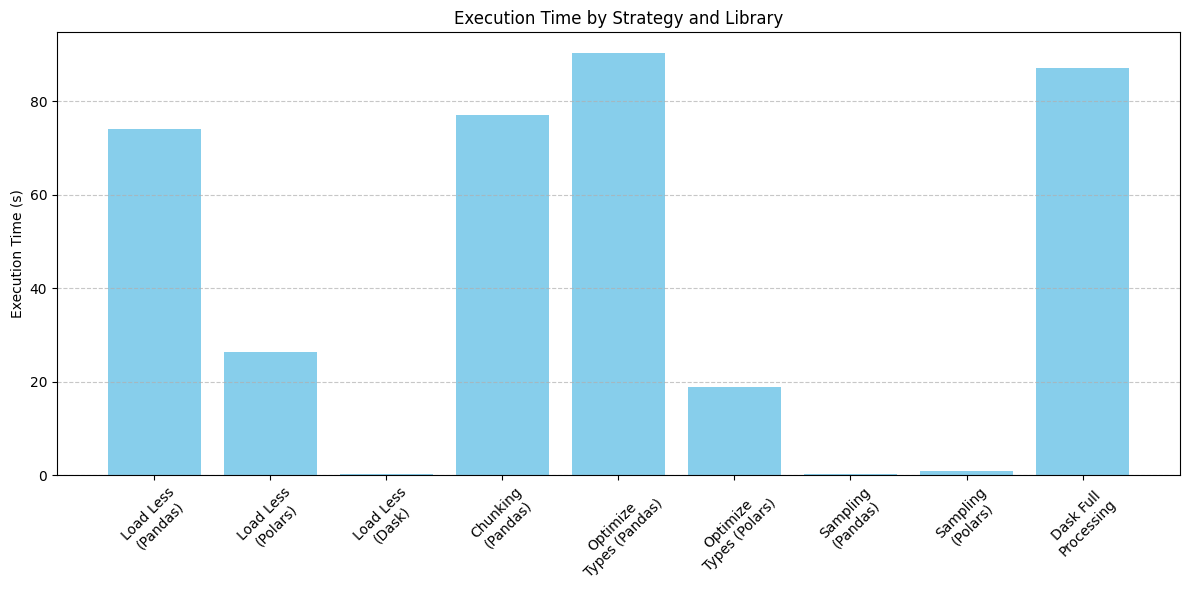

In [23]:
plt.figure(figsize=(12, 6))
plt.bar(strategies, execution_times, color='skyblue')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time by Strategy and Library')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##📉 Chart 2: Memory Usage

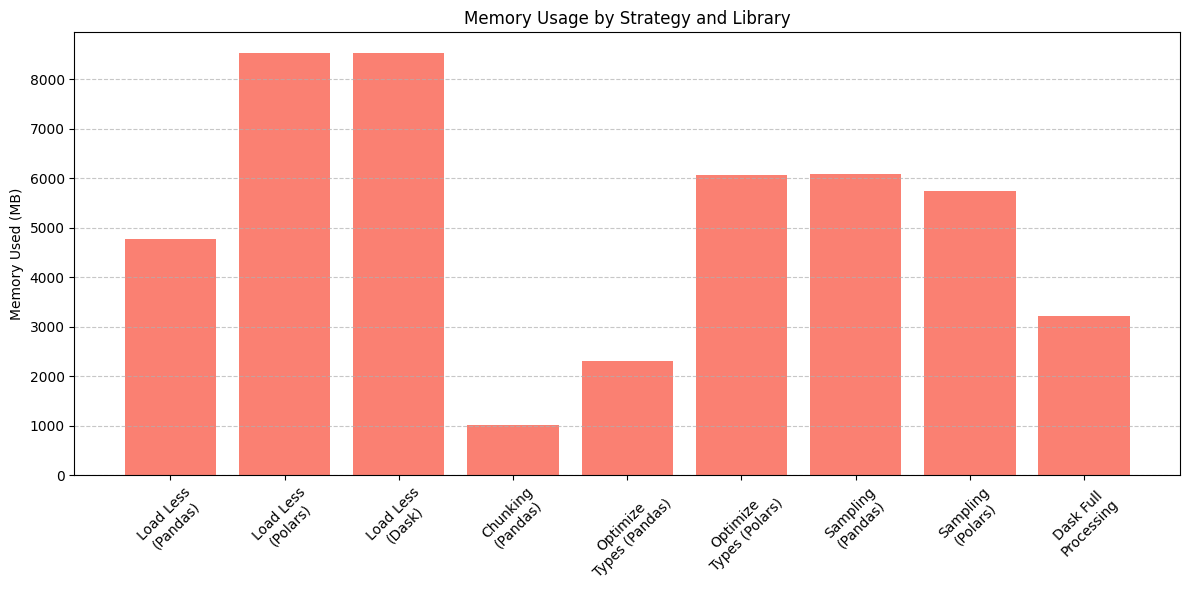

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(strategies, memory_usage, color='salmon')
plt.ylabel('Memory Used (MB)')
plt.title('Memory Usage by Strategy and Library')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd

df = pd.DataFrame({
    'Strategy': strategies,
    'Execution Time (s)': execution_times,
    'Memory Used (MB)': memory_usage
})

print("📊 Performance Summary Table:")
df

📊 Performance Summary Table:


,Strategy,Execution Time (s),Memory Used (MB)
0,Load Less\n(Pandas),74.03,4771.56
1,Load Less\n(Polars),26.33,8521.61
2,Load Less\n(Dask),0.24,8523.00
3,Chunking\n(Pandas),77.15,1016.05
4,Optimize\nTypes (Pandas),90.25,2312.83
5,Optimize\nTypes (Polars),18.88,6067.03
6,Sampling\n(Pandas),0.31,6077.17
7,Sampling\n(Polars),0.95,5742.82
8,Dask Full\nProcessing,87.14,3212.63


## 🧾 Task 5: Conclusion & Reflection

### ✅ Key Observations:
- Loading only necessary **columns** or **rows** significantly reduces memory usage.
- **Chunking** is useful for large-scale processing when full data doesn’t fit in memory.
- **Data type optimization** provides the best performance-memory tradeoff.
- **Sampling** is great for prototyping but not for final analysis.
- **Dask** enables parallel processing and scales well beyond system memory limits.

### 📉 Benefits and Limitations:

| Strategy       | Benefit                                 | Limitation                             |
|----------------|------------------------------------------|----------------------------------------|
| Load Less      | Simple, fast                           | Loses potentially useful features      |
| Chunking       | Handles huge files                     | Cumbersome for complex transformations |
| Optimize Types | Maximizes speed and memory efficiency  | Requires domain knowledge              |
| Sampling       | Super fast for testing                 | May lose accuracy                      |
| Dask           | Scales beyond memory, supports parallel| Steeper learning curve                 |

### 🧠 What I Learned:
- Large datasets require careful handling to avoid crashes or long waits.
- Techniques like **data type optimization** and **sampling** are essential for quick experimentation.
- Tools like **Dask** open the door for true big data processing without switching to distributed systems like Spark.